In [1]:
%matplotlib inline

import pandas as pd
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from tqdm import tqdm_notebook
from dask.diagnostics import ProgressBar
from matplotlib import gridspec

In [2]:
session = cc.database.create_session()

In [3]:
with ProgressBar():
'1 daily',    darray = cc.querying.getvar(session=session, expt='01deg_jra55v13_iaf', variable='vert_pv', n=6)
    PV = darray.sel(yt_ocean=slice(25,75)).sel(st_ocean=slice(0,1500)).groupby('time.season').mean('time').compute()
    darray = cc.querying.getvar(session=session, expt='01deg_jra55v13_iaf', variable='mld', n=6)
    mld = darray.sel(yt_ocean=slice(25,75)).groupby('time.season').mean('time').compute()
    #pot_rho_0 = cc.get_nc_variable('01deg_jra55v13_iaf', 'ocean.nc', 'pot_rho_0', n=20, time_units = 'days since 0001-01-01').sel(yt_ocean=slice(-75,-25)).sel(st_ocean=slice(0,2500)).groupby('time.season').mean('time').compute()
    darray = cc.querying.getvar(session=session, expt='01deg_jra55v13_iaf', variable='pot_rho_2', n=6)
    pot_rho_2 = darray.sel(yt_ocean=slice(25,75)).sel(st_ocean=slice(0,1500)).groupby('time.season').mean('time').compute()
    #vent_age = cc.get_nc_variable('01deg_jra55v13_iaf', 'ocean.nc', 'age_global', n=6, time_units = 'days since 0001-01-01').sel(yt_ocean=slice(-75,-25)).sel(st_ocean=slice(0,2500)).groupby('time.season').mean('time').compute()
    #v = cc.get_nc_variable('01deg_jra55v13_iaf', 'ocean.nc', 'v', n=6, time_units = 'days since 0001-01-01').sel(yu_ocean=slice(-75,-25)).sel(st_ocean=slice(0,2500)).groupby('time.season').mean('time').compute()

[########################################] | 100% Completed | 6.80 ss
[########################################] | 100% Completed | 134.01 s
[########################################] | 100% Completed | 1.11 sms
[########################################] | 100% Completed | 3.85 sms
[########################################] | 100% Completed | 835.00 ms
[########################################] | 100% Completed | 112.04 s


In [4]:
PV

<xarray.DataArray 'vert_pv' (season: 4, st_ocean: 51, yt_ocean: 842,
                             xt_ocean: 3600)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 25.02 25.11 25.2 25.29 ... 74.9 74.94 74.98
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 1.333e+03 1.453e+03
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    long_name:      vertical piece of Ertel PV: (f+zeta)*N^2
    units:          1/sec^3
    valid_range:    [-1000000.  1000000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    ncfiles:        ['/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2019-04-12
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Source code: https://github.com/COSIMA/access-om2/release...

Text(0.5, 0, 'Latitude')

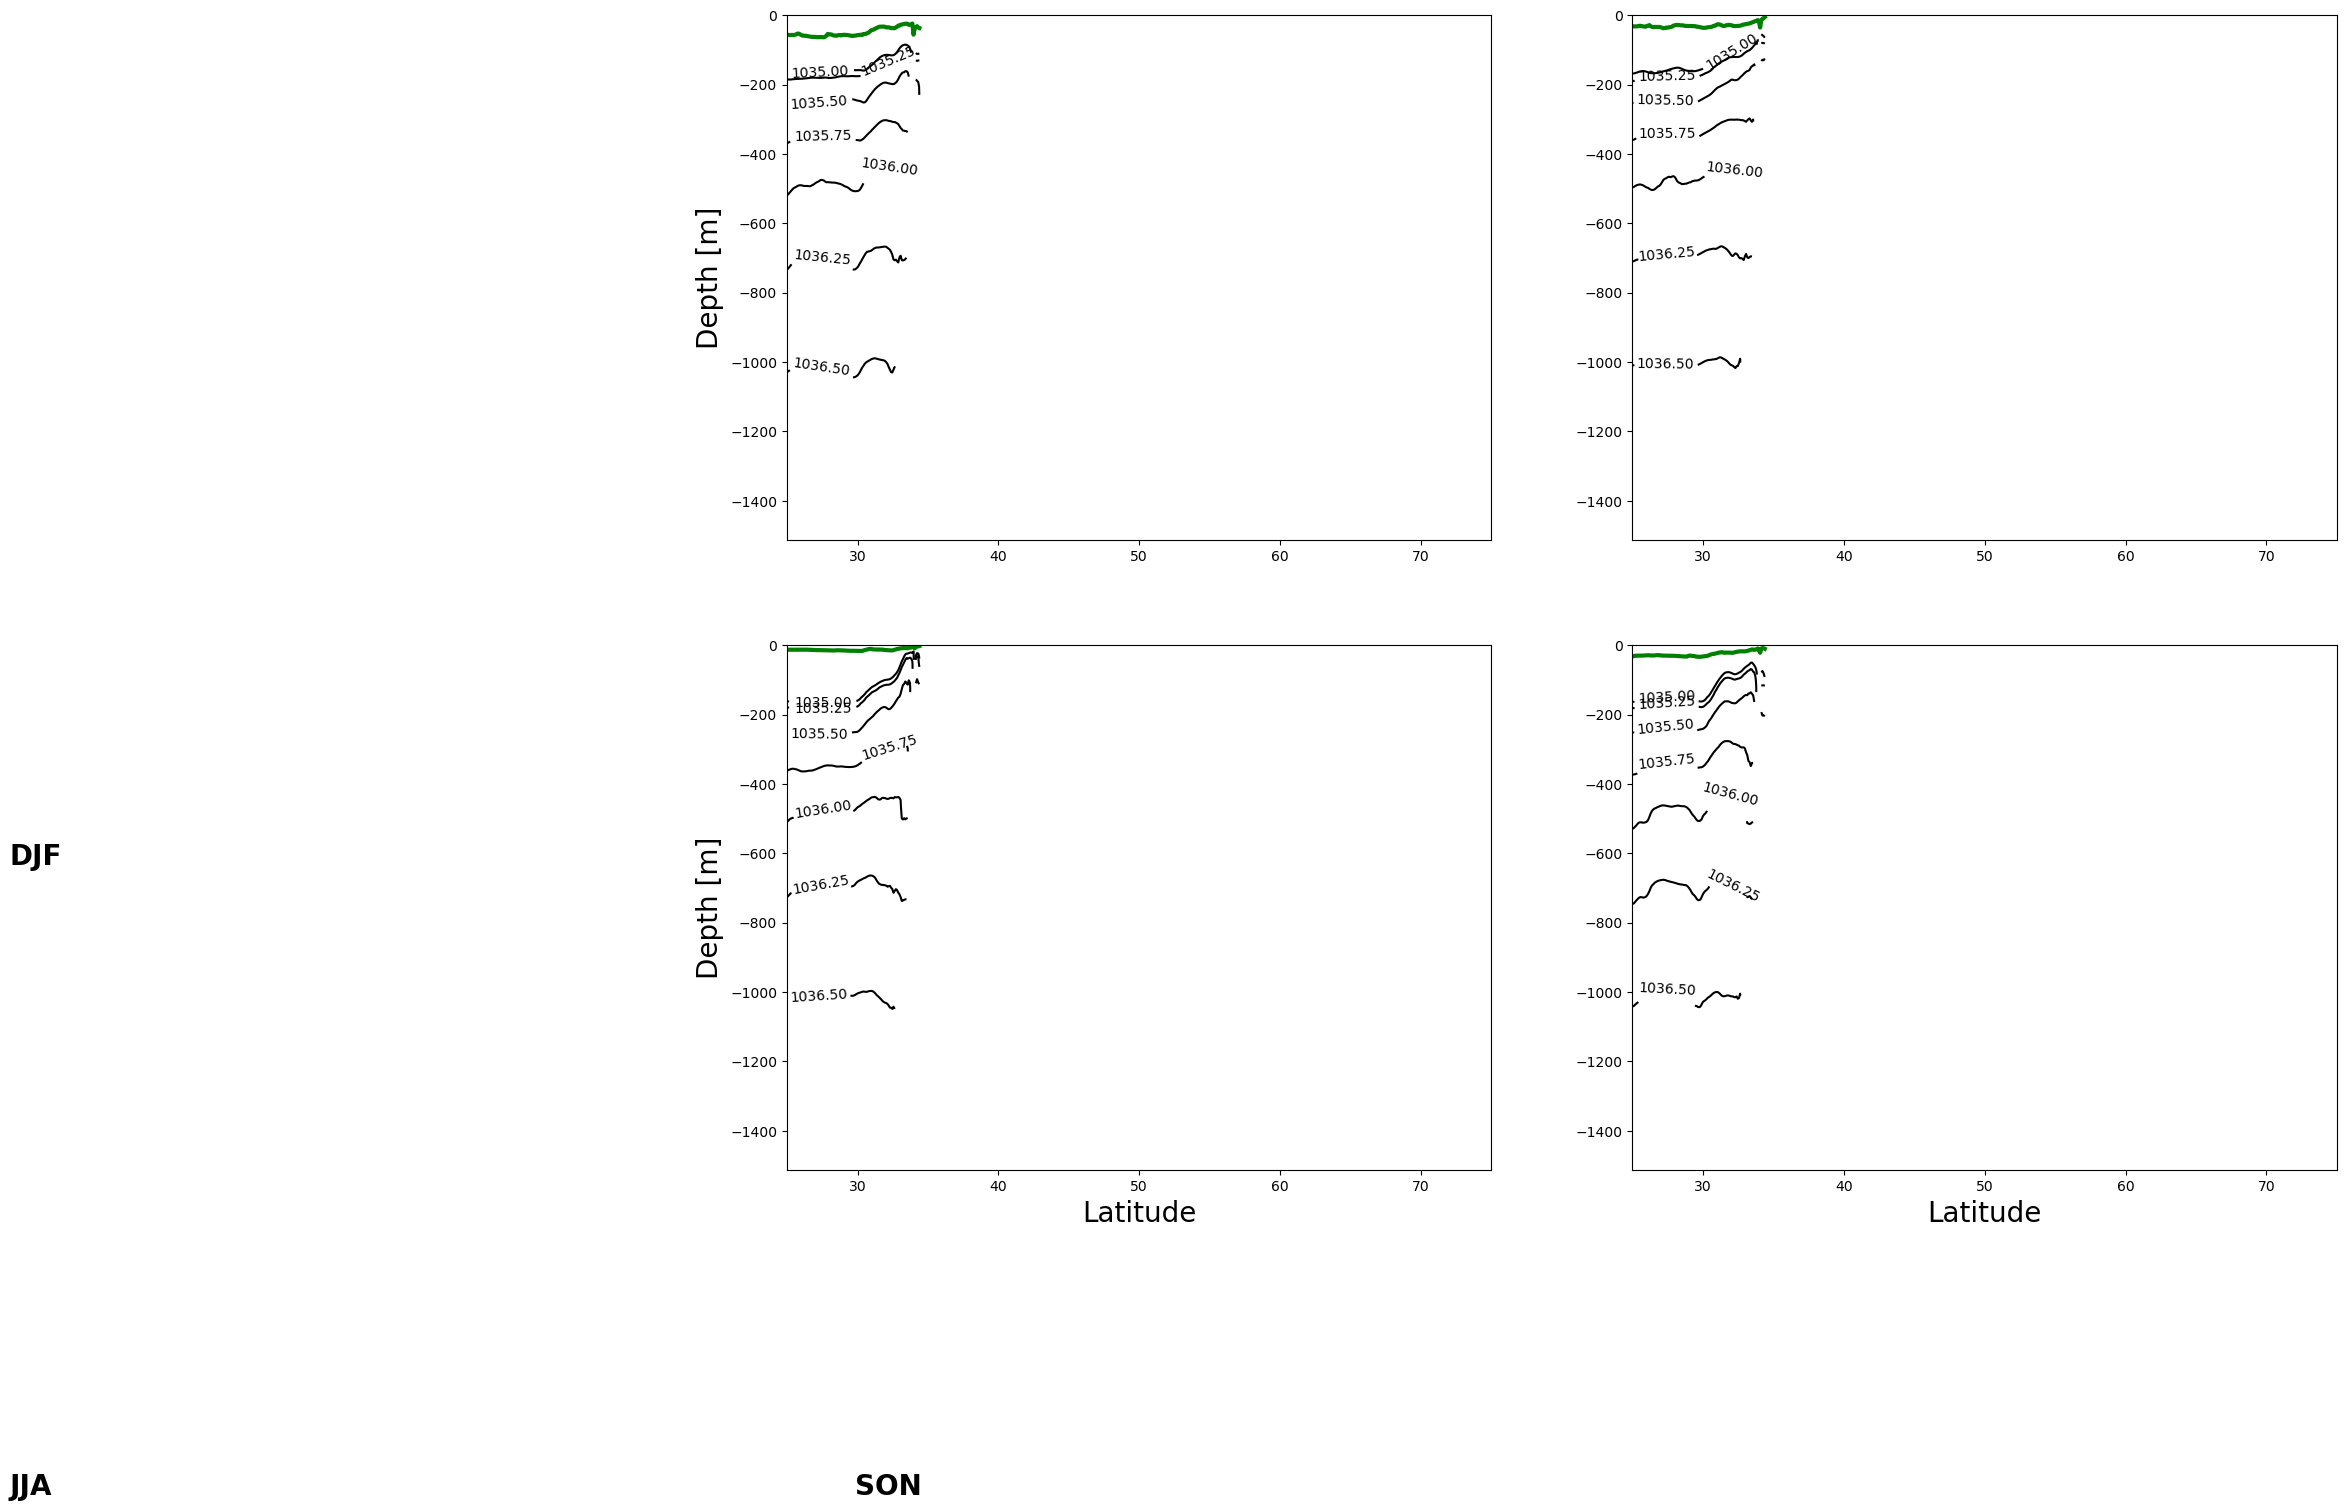

In [5]:
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 2)#, width_ratios=[1, 1, 1, 1]) 
gs.update(wspace=0.002, hspace=0.002)

plt.subplot(2,2,1)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='DJF').sel(xt_ocean=-120.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='DJF').sel(xt_ocean=-120.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='DJF').sel(xt_ocean=-120.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off')
plt.text(-30.2, -2450, 'DJF',color='k',fontsize=20,fontweight='bold')
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,2)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='MAM').sel(xt_ocean=-120.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='MAM').sel(xt_ocean=-120.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='MAM').sel(xt_ocean=-120.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off', left='off', labelleft='off')
plt.text(-30.2, -2450, 'MAM',color='k',fontsize=20,fontweight='bold')

plt.subplot(2,2,3)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='JJA').sel(xt_ocean=-120.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='JJA').sel(xt_ocean=-120.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='JJA').sel(xt_ocean=-120.,method='nearest'),'g',linewidth=3)
plt.text(-30.2, -2450, 'JJA',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,4)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='SON').sel(xt_ocean=-120.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='SON').sel(xt_ocean=-120.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='SON').sel(xt_ocean=-120.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', left='off', labelleft='off')
plt.text(-30.2, -2450, 'SON',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)

Text(0.5, 0, 'Latitude')

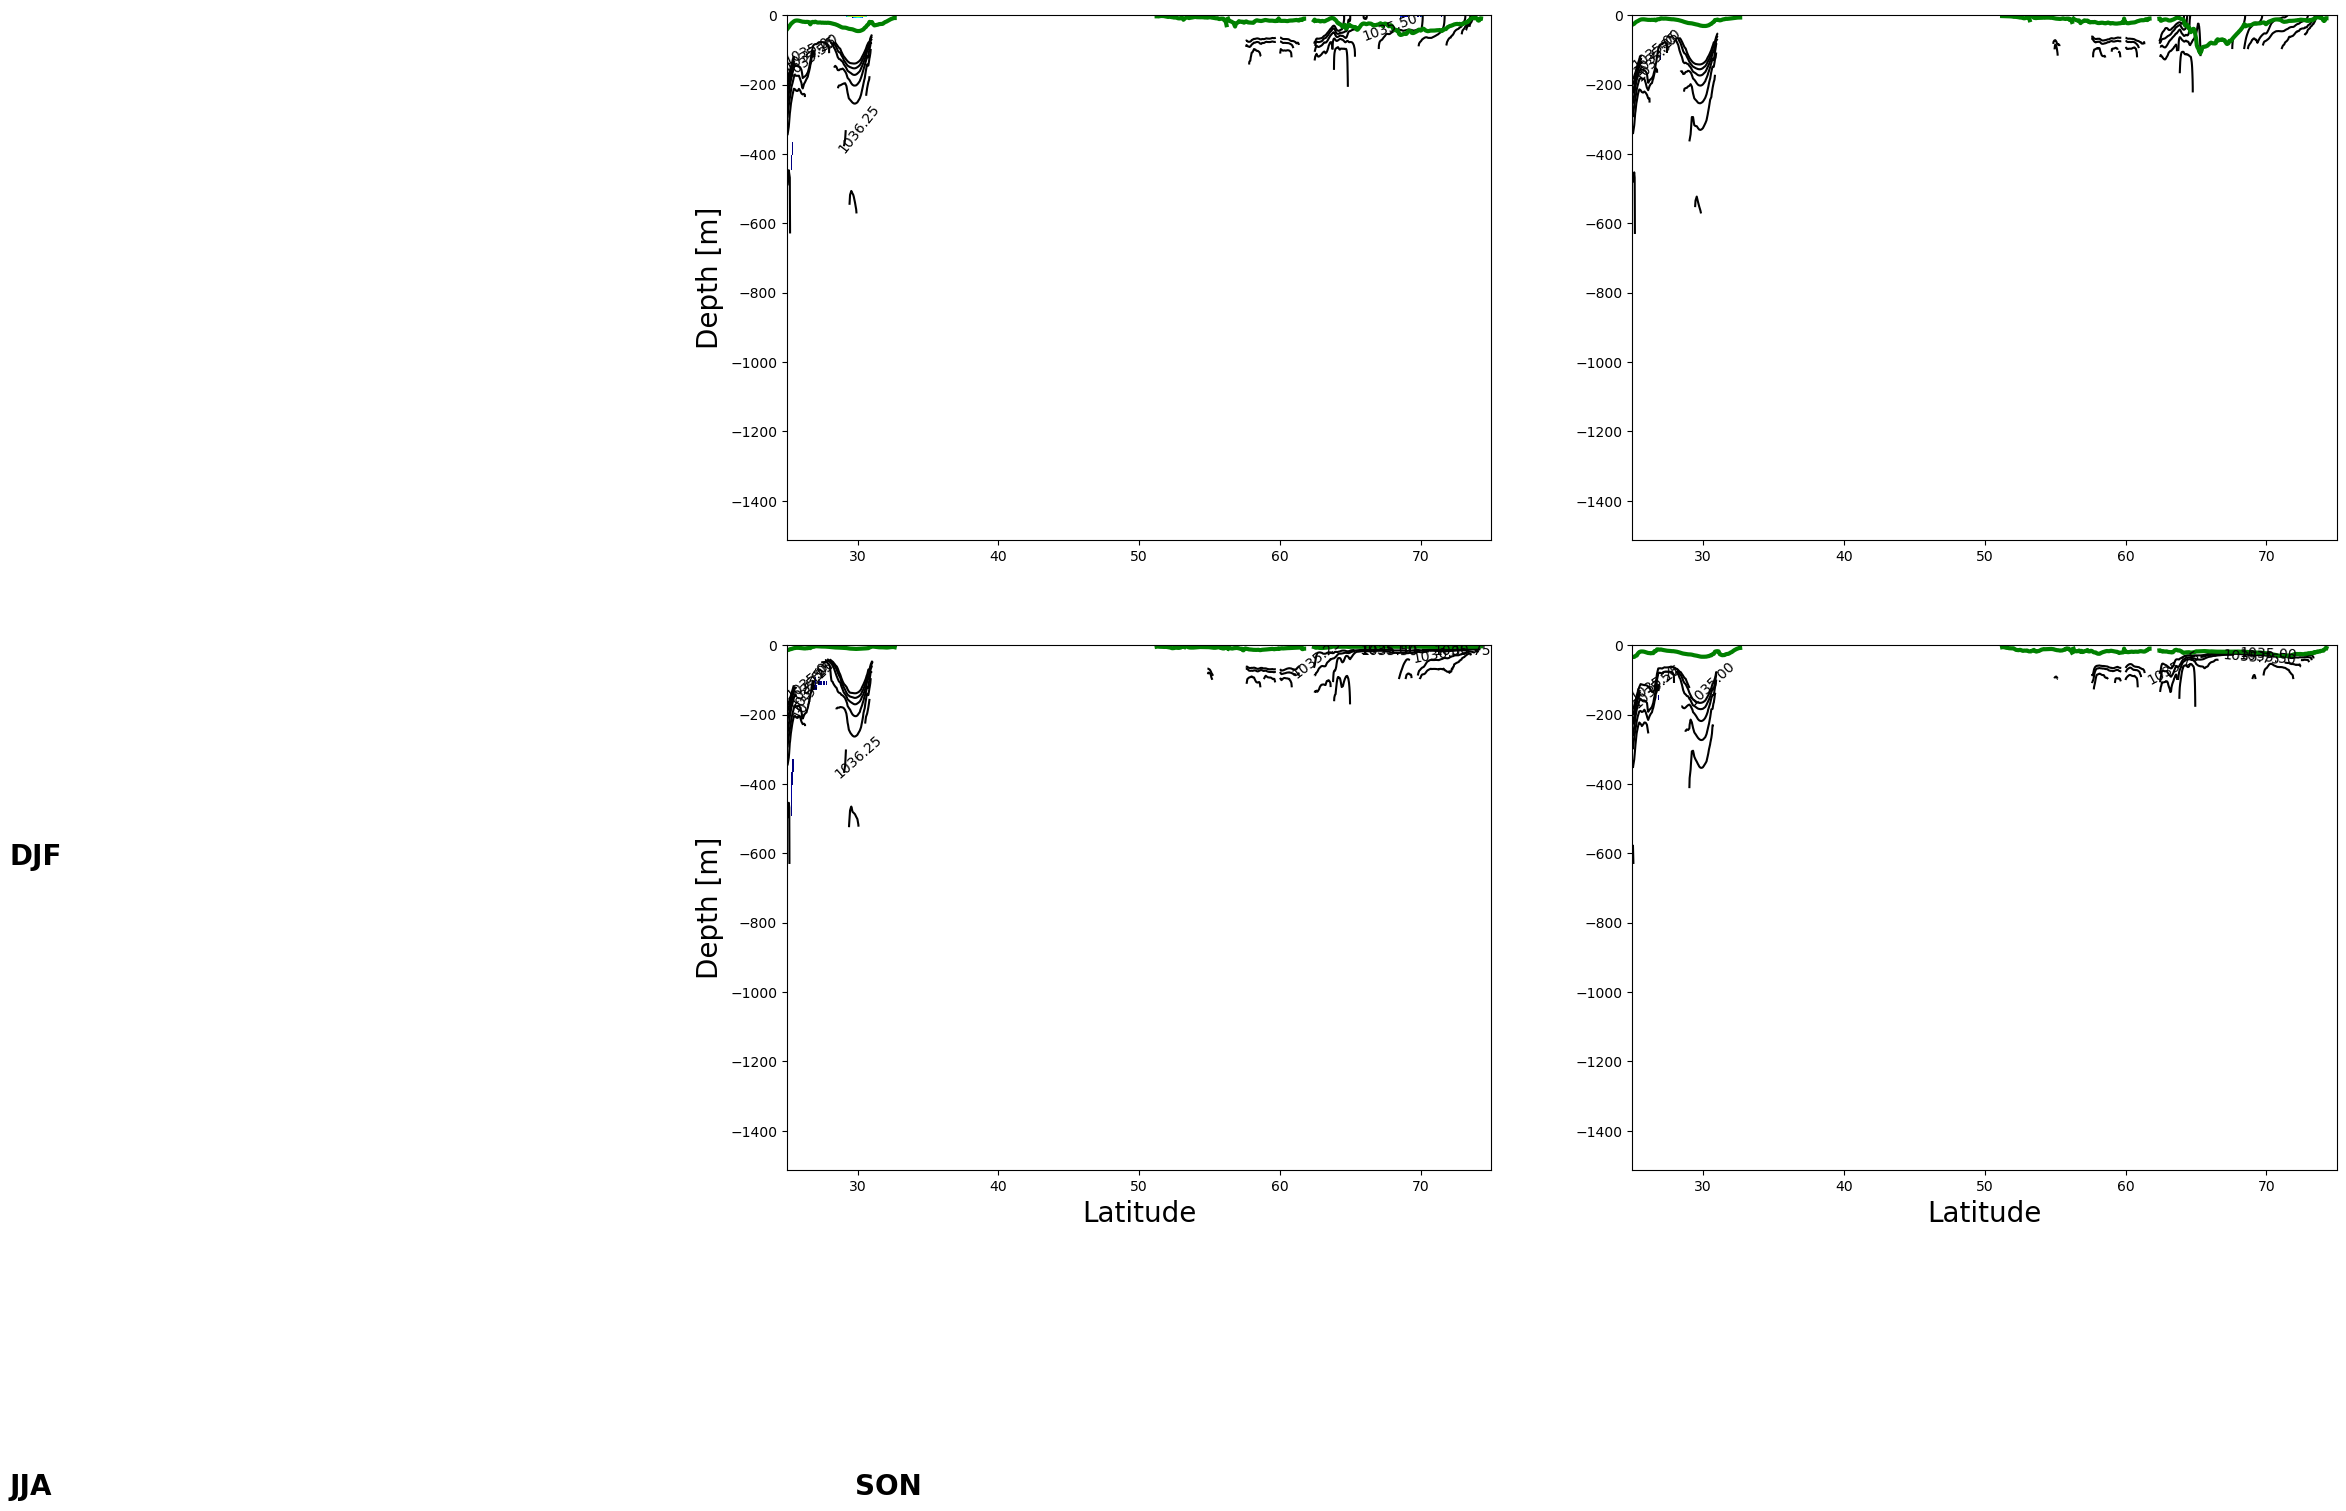

In [6]:
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 2)#, width_ratios=[1, 1, 1, 1]) 
gs.update(wspace=0.002, hspace=0.002)

plt.subplot(2,2,1)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='DJF').sel(xt_ocean=-80.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='DJF').sel(xt_ocean=-80.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='DJF').sel(xt_ocean=-80.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off')
plt.text(-30.2, -2450, 'DJF',color='k',fontsize=20,fontweight='bold')
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,2)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='MAM').sel(xt_ocean=-80.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='MAM').sel(xt_ocean=-80.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='MAM').sel(xt_ocean=-80.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off', left='off', labelleft='off')
plt.text(-30.2, -2450, 'MAM',color='k',fontsize=20,fontweight='bold')

plt.subplot(2,2,3)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='JJA').sel(xt_ocean=-80.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='JJA').sel(xt_ocean=-80.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='JJA').sel(xt_ocean=-80.,method='nearest'),'g',linewidth=3)
plt.text(-30.2, -2450, 'JJA',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,4)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='SON').sel(xt_ocean=-80.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='SON').sel(xt_ocean=-80.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='SON').sel(xt_ocean=-80.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', left='off', labelleft='off')
plt.text(-30.2, -2450, 'SON',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)

Text(0.5, 0, 'Latitude')

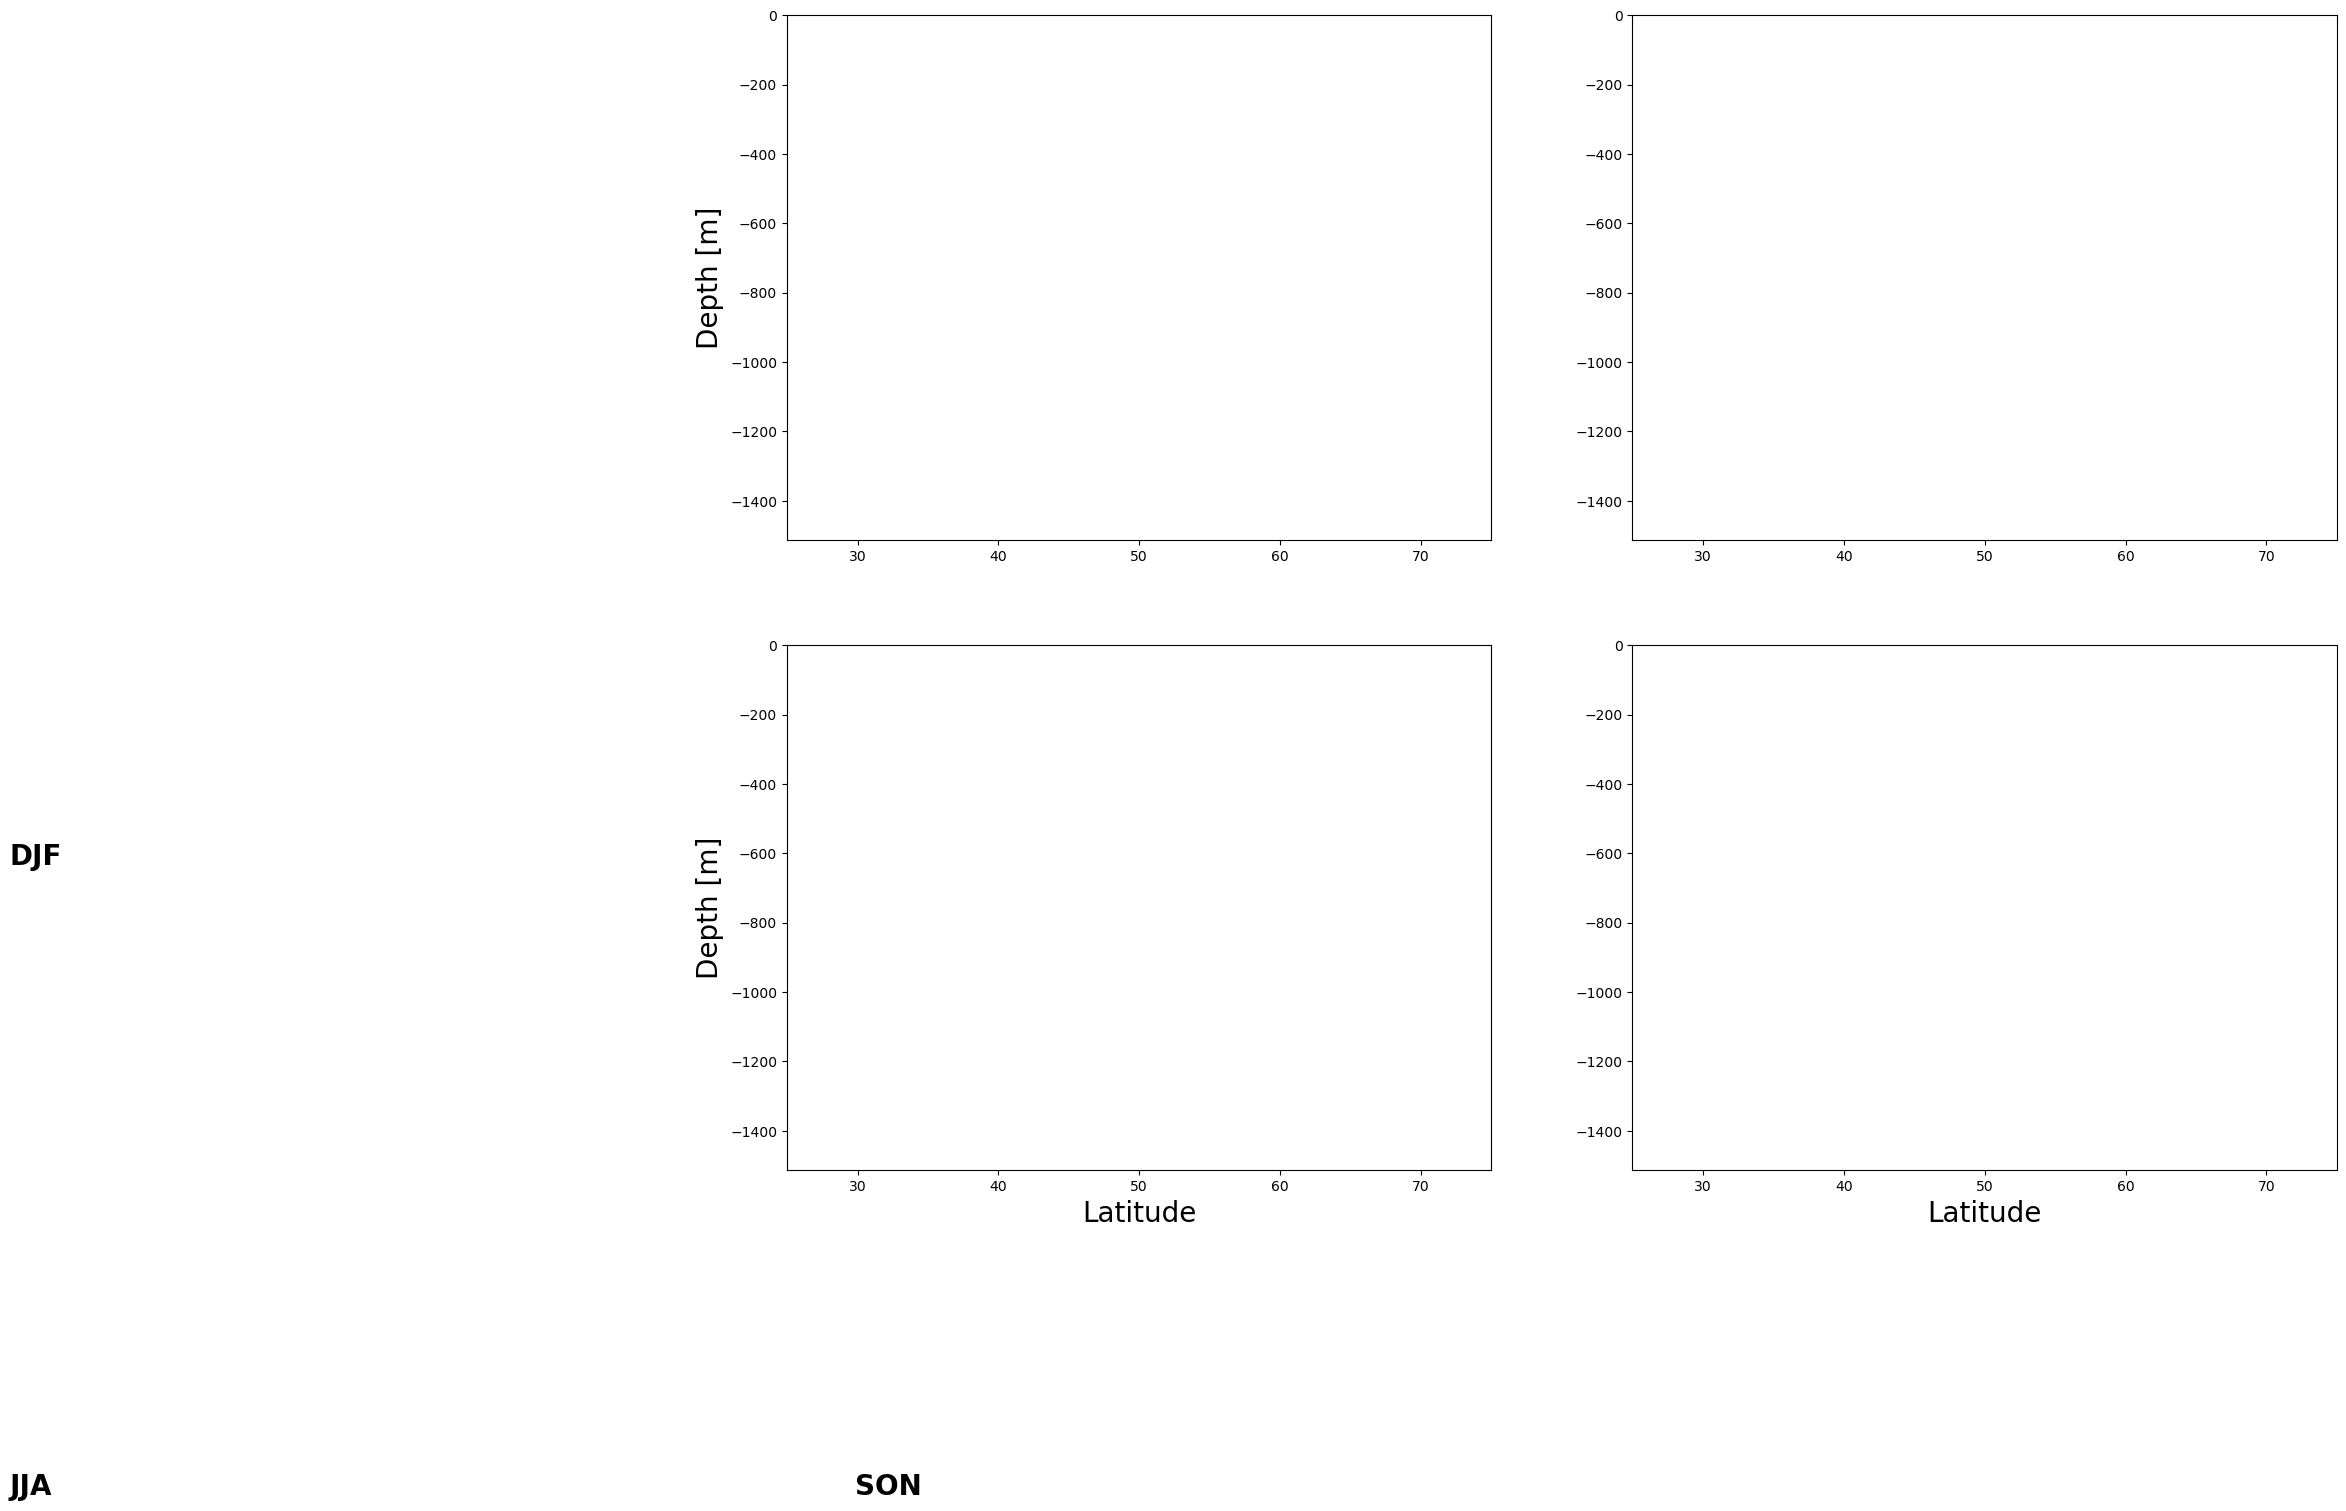

In [7]:
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 2)#, width_ratios=[1, 1, 1, 1]) 
gs.update(wspace=0.002, hspace=0.002)

plt.subplot(2,2,1)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='DJF').sel(xt_ocean=-250.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='DJF').sel(xt_ocean=-250.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='DJF').sel(xt_ocean=-250.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off')
plt.text(-30.2, -2450, 'DJF',color='k',fontsize=20,fontweight='bold')
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,2)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='MAM').sel(xt_ocean=-250.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='MAM').sel(xt_ocean=-250.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='MAM').sel(xt_ocean=-250.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off', left='off', labelleft='off')
plt.text(-30.2, -2450, 'MAM',color='k',fontsize=20,fontweight='bold')

plt.subplot(2,2,3)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='JJA').sel(xt_ocean=-250.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='JJA').sel(xt_ocean=-250.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='JJA').sel(xt_ocean=-250.,method='nearest'),'g',linewidth=3)
plt.text(-30.2, -2450, 'JJA',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,4)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='SON').sel(xt_ocean=-250.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='SON').sel(xt_ocean=-250.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='SON').sel(xt_ocean=-250.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', left='off', labelleft='off')
plt.text(-30.2, -2450, 'SON',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)

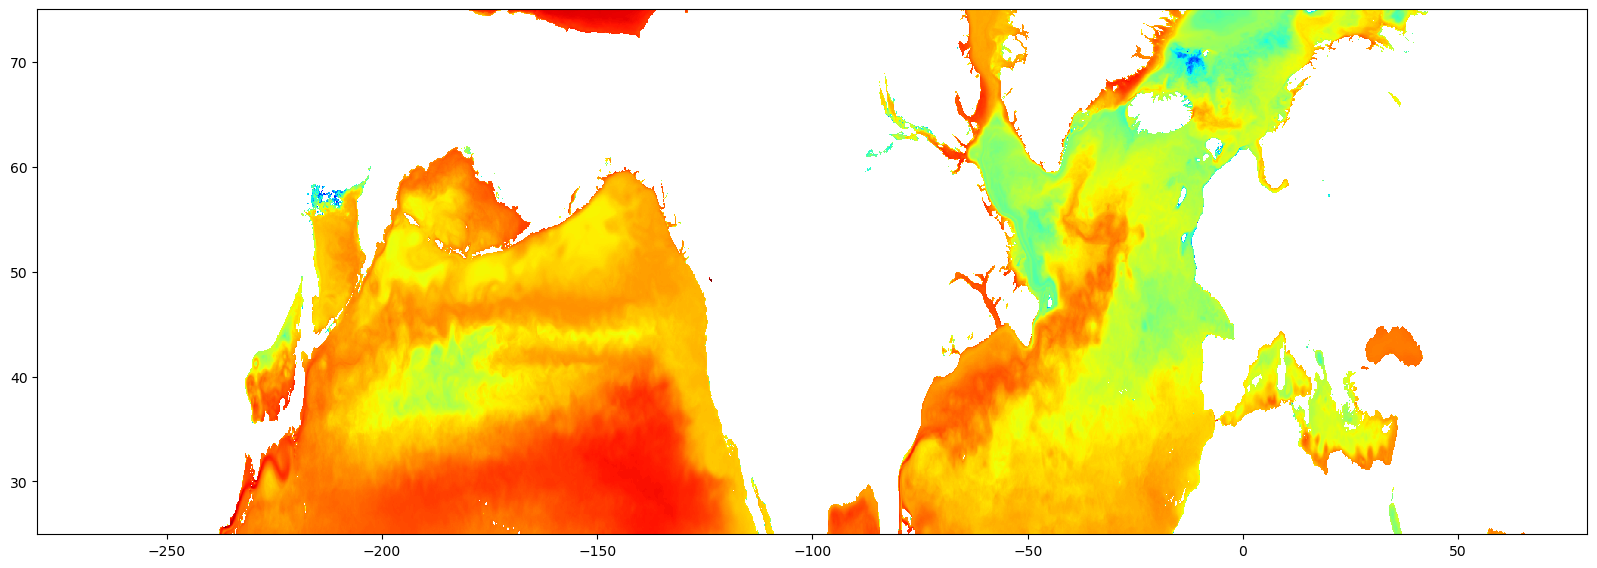

In [8]:
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 1)#, width_ratios=[1, 1, 1, 1]) 
gs.update(wspace=0.002, hspace=0.002)

plt.subplot(2,1,1)
plt.pcolormesh(PV.xt_ocean,PV.yt_ocean,np.log10(PV.sel(st_ocean=200.,method='nearest').mean('season')),cmap='jet')
#plt.clim(-11,-8.5)
#plt.ylim(-65,-35)
#CS=plt.contour(vent_age.xt_ocean,vent_age.yt_ocean,vent_age.sel(season='DJF').sel(st_ocean=500.,method='nearest'),levels=[5,20,38],colors='k')

#plt.subplot(2,1,2)
#plt.pcolormesh(vent_age.xt_ocean,vent_age.yt_ocean,vent_age.sel(season='DJF').sel(st_ocean=450.,method='nearest'),cmap='jet')
#plt.clim(0,50)
#plt.clabel(CS)
#plt.plot(mld.yt_ocean,-mld.sel(season='DJF').sel(xt_ocean=-80.,method='nearest'),'g',linewidth=3)
#plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off')
#plt.text(-30.2, -2450, 'DJF',color='k',fontsize=20,fontweight='bold')
#plt.ylabel('Depth [m]',fontsize=20)


In [9]:
plt.pcolormesh(v.yu_ocean,-v.st_ocean,v.sel(xu_ocean=-80.,method='nearest').mean('season'),cmap='jet')
plt.colorbar()
plt.clim(-0.05,0.05)

NameError: name 'v' is not defined

In [ ]:
v